<h1>Template Summary</h1>
<p>Any predictive modeling machine learning project can be broken down into six common tasks:</p>
<ol>
    <li>Define Problem:</li>
    <ol type="i">
        <li>Load Library: modules, classes and functions that we intend to use</li>
        <li>Load Dataset: entirely or partially such as we can prototype fast</li>
    </ol>
    <li>Summarize Data: understand the data that we have available</li>
    <ol type="i">
        <li>Descriptive Statistics: summaries of our data</li>
        <li>Data Visualization: use the results to prompt a lot of questions</li>
    </ol>
    <li>Prepare Data: best exposes the structure of the problem and the relationships between your input attributes with the output variable</li>
    <ol type="i">
        <li>Data Cleaning: removing duplicates, marking missing values, ...</li>
        <li>Feature Selection: remove redundant features and eventually develop new features</li>
        <li>Data Transform: attributes are scaled in order to best expose better the structure of the problem</li>
    </ol>
    <li>Evaluate Algorithms: find a subset of machine learning algorithms that are good at exploiting the structure of our data</li>
    <ol type="i">
        <li>Split-out Validation Dataset: use it later to confirm the skill of our developed model</li>
        <li>Test Options and Evaluation Metrics (e.g. cross validation and the evaluation metric to use)</li>
        <li>Spot-check Algorithms: try various lineare / non linear ML Algorithms</li>
        <li>Compare Algorithms</li>
    </ol>
    <li>Improve Results: get the most out of the best algorithms selected</li>
    <ol type="i">
        <li>Algorithm Tuning: search for a combination of parameters</li>
        <li>Ensembles: try to ensamble 3 or more best algorithms to enhance performance</li>
    </ol>
    <li>Finalize Model:</li>
    <ol type="i">
        <li>Predictions on Validation Dataset: measure performance on unseen data</li>
        <li>Create a Standalone Model on Entire Dataset</li>
        <li>Save the Model</li>
    </ol>
</ol>

Hints:
<ul>
    <li>Cycles: The process in not linear but cyclic, looping between steps between steps 3-4-5 until you achieve a level of accuracy that is sufficient or you run out of time</li>
    <li>Try and do something at each step in the process, even if it does not improve accuracy</li>
    <li>Ratchet Accuracy: Treat changes that you make as experiments that increase accuracy and reorganize other steps around them.
  <li>Adapt As Needed: Modify the steps as you need on a project, especially as you become more experienced with the template</li>

<h1>Example Project</h1>

<h2>1 - Define the Problem</h2>
<p>The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.</p>

<h3>1.1 - Load Library</h3>

In [27]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

<h3>1.2 - Load Dataset</h3>

In [28]:
# Load dataset
url = 'dataset/sonar.all-data.csv'
dataset = read_csv(url, header=None)

<h2>2 - Summarizing Data</h2>

In [29]:
# shape
print("# Instaces: ", dataset.shape[0])
print("# Feature: ", dataset.shape[1])

# Instaces:  208
# Feature:  61


In [30]:
# check if the dataset is loaded correctly
set_option('display.width', dataset.shape[1])
print(dataset.head(5))

      0      1      2      3      4      5      6      7   \
0  0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160   
1  0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348   
2  0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377   
3  0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128   
4  0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247   

      8      9  ...     51     52     53     54     55  \
0  0.311  0.211 ...  0.003  0.006  0.016  0.007  0.017   
1  0.334  0.287 ...  0.008  0.009  0.005  0.009  0.019   
2  0.560  0.619 ...  0.023  0.017  0.009  0.018  0.024   
3  0.060  0.126 ...  0.012  0.004  0.015  0.009  0.007   
4  0.356  0.446 ...  0.003  0.005  0.011  0.011  0.002   

      56     57     58     59  60  
0  0.018  0.008  0.009  0.003   R  
1  0.014  0.005  0.005  0.004   R  
2  0.032  0.016  0.009  0.008   R  
3  0.005  0.004  0.004  0.012   R  
4  0.007  0.005  0.011  0.009   R  

[5 rows x 61 columns]


<h3>2.1 - Descriptive Statistics</h3>

In [31]:
# descriptions
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4   \
count  208.000  2.080e+02  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075   
std      0.023  3.296e-02    0.038    0.047    0.056   
min      0.002  6.000e-04    0.002    0.006    0.007   
25%      0.013  1.645e-02    0.019    0.024    0.038   
50%      0.023  3.080e-02    0.034    0.044    0.062   
75%      0.036  4.795e-02    0.058    0.065    0.100   
max      0.137  2.339e-01    0.306    0.426    0.401   

            5        6        7        8        9   \
count  208.000  208.000  208.000  208.000  208.000   
mean     0.105    0.122    0.135    0.178    0.208   
std      0.059    0.062    0.085    0.118    0.134   
min      0.010    0.003    0.005    0.007    0.011   
25%      0.067    0.081    0.080    0.097    0.111   
50%      0.092    0.107    0.112    0.152    0.182   
75%      0.134    0.154    0.170    0.233    0.269   
max      0.382    0.373    0.459    0.683    0.711   

        

In [32]:
# class distribution
print("Class count:\n", dataset.groupby(60).size())
print("\nClass distribution:\n", (dataset.groupby(60).size() / dataset.shape[0]))

Class count:
 60
M    111
R     97
dtype: int64

Class distribution:
 60
M    0.534
R    0.466
dtype: float64


<h3>2.2 - Data Visualization</h3>

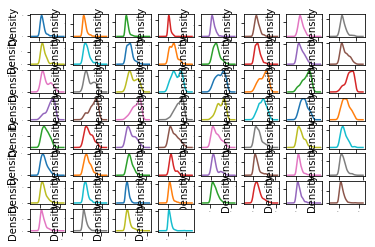

In [34]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()

<p>This is useful, you can see that many of the attributes have a skewed distribution. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.</p>

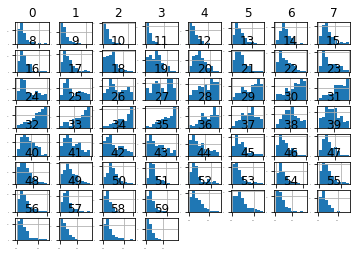

In [35]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

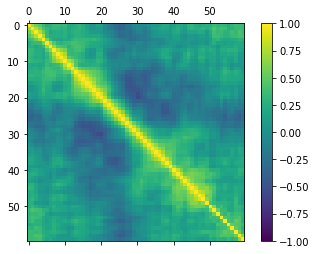

In [37]:
# Let's see the correlation between attributes
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

<p>It looks like there is also some structure in the order of the attributes. The red around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.</p>

<h2>3 - Prepare Data</h2>

<h3>3.3 - Standardize Data</h3>

In 4.3b we will apply a standardization

<h2>4 - Evaluate Algorithms</h2>

<h3>4.1 - Split-out Dataset</h3>

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

<h3>4.2 - Test Options and Evaluation Metrics</h3>
<p>Test option: 10-fold cross validation<br>
Metrics: accuracy to evaluate models</p>

<h3>4.3 - Spot-check Algorithms</h3>
<p>Based on what we saw on <i>2.2</i> we get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.</p>
<p>Let’s evaluate six different algorithms:</p>
<ul>
    <li>Logistic Regression (LR)</li>
    <li>Linear Discriminant Analysis (LDA)</li>
    <li>k-Nearest Neighbors (KNN)</li>
    <li>Classification and Regression Trees (CART)</li>
    <li>Gaussian Naive Bayes (NB)</li>
    <li>Support Vector Machines (SVM)</li>
<p>This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.</p>

In [51]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("name:", name, "mean accuracy(%):", round(cv_results.mean() * 100, 3), 
          "std accuracy(%):", round(cv_results.std() * 100, 3))


name: LR mean accuracy(%): 78.272 std accuracy(%): 9.38
name: LDA mean accuracy(%): 74.632 std accuracy(%): 11.785
name: KNN mean accuracy(%): 80.809 std accuracy(%): 6.751
name: CART mean accuracy(%): 74.743 std accuracy(%): 8.677
name: NB mean accuracy(%): 64.89 std accuracy(%): 14.187
name: SVM mean accuracy(%): 60.882 std accuracy(%): 11.866


<h3>4.4 - Compare algorithms</h3>

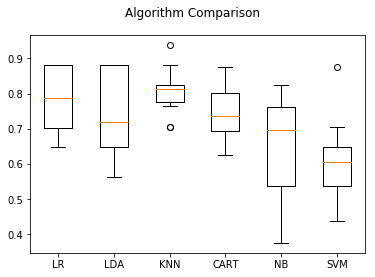

In [49]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<p>The results show a tight distribution for KNN which is encouraging, suggesting low variance.<br>The poor results for SVM are surprising.</p>

<p>It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms such as SVM. Now we will try with a standardized copy of the training dataset.</p>

In [53]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print("Accuracy on dev set:", accuracy_score(Y_validation, predictions))
print("\nClassification Report:\n", classification_report(Y_validation, predictions))

Accuracy on dev set: 0.7380952380952381

Classification Report:
              precision    recall  f1-score   support

          M       0.83      0.74      0.78        27
          R       0.61      0.73      0.67        15

avg / total       0.75      0.74      0.74        42



In [54]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("name:", name, "mean accuracy(%):", round(cv_results.mean() * 100, 3), 
          "std accuracy(%):", round(cv_results.std() * 100, 3))

name: ScaledLR mean accuracy(%): 73.419 std accuracy(%): 9.589
name: ScaledLDA mean accuracy(%): 74.632 std accuracy(%): 11.785
name: ScaledKNN mean accuracy(%): 82.574 std accuracy(%): 5.451
name: ScaledCART mean accuracy(%): 74.706 std accuracy(%): 11.378
name: ScaledNB mean accuracy(%): 64.89 std accuracy(%): 14.187
name: ScaledSVM mean accuracy(%): 83.64 std accuracy(%): 8.87


<p>The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that configuration beyond the default may yield even more accurate models.</p>

<h2>5 - Improving Results</h2>

<h3>5.1 - Algorithm Tuning</h3>
<p>We investigate tuning the parameters for two algorithms that show promise from the spot-checking previously: KNN and SVM.</p>


<h4>5.1.1 - KNN Tuning</h4>
<p>The default number of neighbors is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value is evaluated using 10-fold cross validation on the training standardized dataset.</p>

In [58]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean accuracy(%):", round(mean * 100, 3), 
          "std accuracy(%):", round(stdev * 100, 3),
          "param:", param)

Best: 0.849398 using {'n_neighbors': 1}
mean accuracy(%): 84.94 std accuracy(%): 5.988 param: {'n_neighbors': 1}
mean accuracy(%): 83.735 std accuracy(%): 6.63 param: {'n_neighbors': 3}
mean accuracy(%): 83.735 std accuracy(%): 3.75 param: {'n_neighbors': 5}
mean accuracy(%): 76.506 std accuracy(%): 8.951 param: {'n_neighbors': 7}
mean accuracy(%): 75.301 std accuracy(%): 8.698 param: {'n_neighbors': 9}
mean accuracy(%): 73.494 std accuracy(%): 10.489 param: {'n_neighbors': 11}
mean accuracy(%): 73.494 std accuracy(%): 10.584 param: {'n_neighbors': 13}
mean accuracy(%): 72.892 std accuracy(%): 7.587 param: {'n_neighbors': 15}
mean accuracy(%): 71.084 std accuracy(%): 7.872 param: {'n_neighbors': 17}
mean accuracy(%): 72.289 std accuracy(%): 8.456 param: {'n_neighbors': 19}
mean accuracy(%): 71.084 std accuracy(%): 10.883 param: {'n_neighbors': 21}


<h4>5.1.2 - SVM Tuning</h4>
<p>We can tune two key parameters of the SVM algorithm:</p>
    <li>the value of C (how much to relax the margin, default is 1.0)</li>
    <li>the type of kernel (default is  The default the Radial Basis Function (RBF)</li>
<p>We will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).</p>

In [59]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean accuracy(%):", round(mean * 100, 3), 
          "std accuracy(%):", round(stdev * 100, 3),
          "param:", param)

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
mean accuracy(%): 75.904 std accuracy(%): 9.886 param: {'C': 0.1, 'kernel': 'linear'}
mean accuracy(%): 53.012 std accuracy(%): 11.878 param: {'C': 0.1, 'kernel': 'poly'}
mean accuracy(%): 57.229 std accuracy(%): 13.034 param: {'C': 0.1, 'kernel': 'rbf'}
mean accuracy(%): 70.482 std accuracy(%): 6.636 param: {'C': 0.1, 'kernel': 'sigmoid'}
mean accuracy(%): 74.699 std accuracy(%): 10.891 param: {'C': 0.3, 'kernel': 'linear'}
mean accuracy(%): 64.458 std accuracy(%): 13.229 param: {'C': 0.3, 'kernel': 'poly'}
mean accuracy(%): 76.506 std accuracy(%): 9.231 param: {'C': 0.3, 'kernel': 'rbf'}
mean accuracy(%): 73.494 std accuracy(%): 5.463 param: {'C': 0.3, 'kernel': 'sigmoid'}
mean accuracy(%): 74.096 std accuracy(%): 8.303 param: {'C': 0.5, 'kernel': 'linear'}
mean accuracy(%): 68.072 std accuracy(%): 9.864 param: {'C': 0.5, 'kernel': 'poly'}
mean accuracy(%): 78.916 std accuracy(%): 6.432 param: {'C': 0.5, 'kernel': 'rbf'}
mean accuracy(

<h3>5.2 - Ensemble Methods</h3>
<p>We will evaluate four different ensemble machine learning algorithms:</p>
<p>Boosting Methods:</p>
    <li>AdaBoost (AB)</li>
    <li>Gradient Boosting (GBM)</li>
<p>Bagging Methods:</p>
    <li>Random Forests (RF)</li>
    <li>Extra Trees (ET)</li>

<p>We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.</p>

In [60]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("name:", name, "mean accuracy(%):", round(cv_results.mean() * 100, 3), 
          "std accuracy(%):", round(cv_results.std() * 100, 3))

name: AB mean accuracy(%): 81.985 std accuracy(%): 5.829
name: GBM mean accuracy(%): 84.779 std accuracy(%): 10.77
name: RF mean accuracy(%): 74.706 std accuracy(%): 7.349
name: ET mean accuracy(%): 77.022 std accuracy(%): 7.688


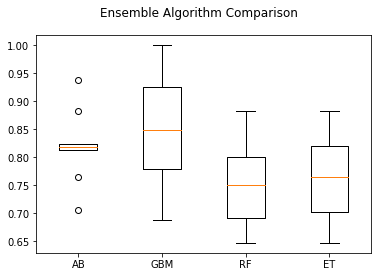

In [63]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h2>6 - Finalize the Model</h2>

<h3>6.1 - Test on Validation Set</h3>
<p>The SVM standardized showed the most promise as a low complexity and stable model for this problem, so we will finalize the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm our findings.</p>

In [71]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



<p>We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset. A score that matches closely to our expectations estimated above during the tuning of SVM.</p>